In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds

In [3]:
(dataset_train_original, dataset_validate_original), info = tfds.load(
    "fashion_mnist",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\DAnand\tensorflow_datasets\fashion_mnist\3.0.1.incompleteKG67AG\fashion_mnist-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\DAnand\tensorflow_datasets\fashion_mnist\3.0.1.incompleteKG67AG\fashion_mnist-test.tfrecord…

Dataset fashion_mnist downloaded and prepared to C:\Users\DAnand\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07

# Look at your beeping data

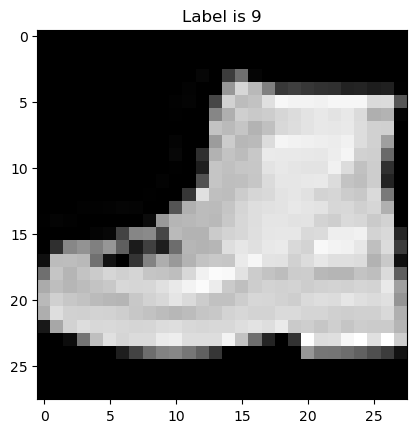

In [8]:
for x,y in dataset_train_original.shuffle(100).take(1):
    # print(type(x), type(y))
    plt.imshow(x.numpy().squeeze(), cmap="gray")
    plt.title(f"Label is {y}")

In [9]:
dir(dataset_train_original)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for

# Data preprocessing

1.0


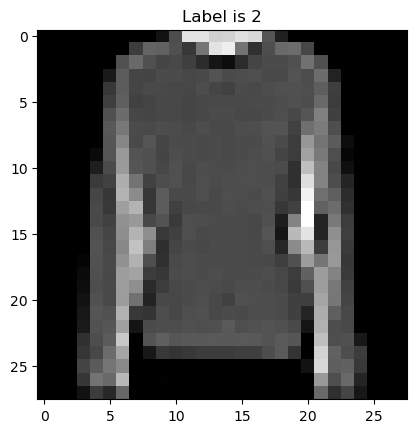

In [10]:
def encode(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label



dataset = dataset_train_original.map(lambda image, label: encode(image, label))

for x,y in dataset.take(1):
    # print(type(x), type(y))
    plt.imshow(x.numpy().squeeze(), cmap="gray")
    plt.title(f"Label is {y}")
    print(np.max(x.numpy()))

In [11]:
dataset_train = dataset_train_original.map(lambda image, label: encode(image, label)).cache().shuffle(60000).batch(128)
dataset_validate = dataset_validate_original.map(lambda image, label: encode(image, label)).cache().batch(128)


In [12]:
for x_batch, y_batch in dataset_train.take(1):
    print(x_batch.shape)

(128, 28, 28, 1)


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(
    8,
    (3,3),
    activation="relu",
    input_shape=(28,28,1)
))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(
    8,
    (3,3),
    activation="relu",
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 1,248
Trainable params: 1,248
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(
    8,
    (3,3),
    activation="relu",
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)              

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(
    8,
    (3,3),
    activation="relu",
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    16,
    (3,3),
    activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    validation_data=dataset_validate,
    epochs=50
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 32)          4640      
                                                                 
 flatten_3 (Flatten)         (None, 288)              

In [19]:
def render_history(history):
    plt.title("Losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

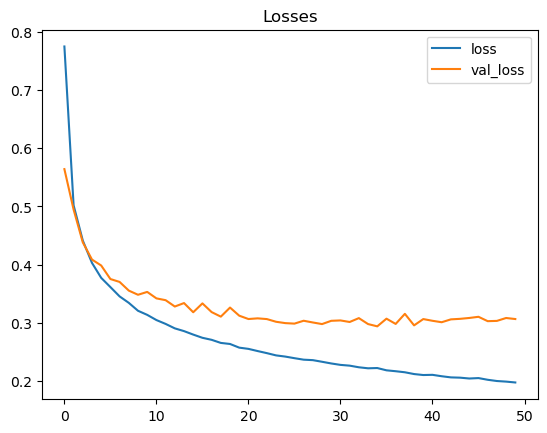

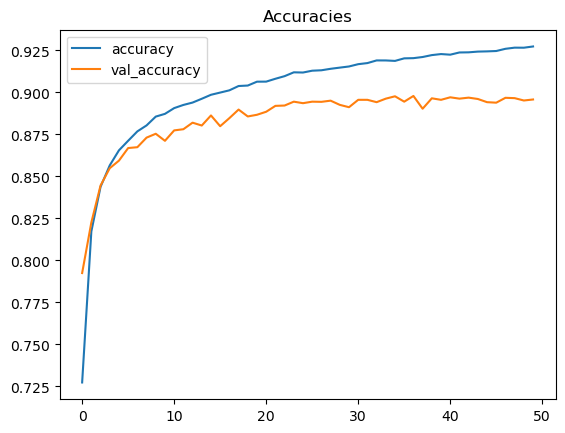

In [20]:
render_history(history)